## `Print the shape`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt = pd.read_csv('olympics.csv')
print(dt.shape)

(271116, 17)


## `Describe the Age column`

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
print(olympics['Age'].describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


## `Print numeric datatypes`

In [23]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
desc = olympics.dtypes
for i in range(len(desc)):
    if desc.values[i] != 'object':
        print(desc.index[i])
    else:
        continue
        
print(olympics.select_dtypes(include = np.number).columns.to_list())

ID
Age
Height
Weight
Year
['ID', 'Age', 'Height', 'Weight', 'Year']


## `Null values`

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
nv = olympics.isna().sum()
for i in range(len(nv)):
    if nv.values[i] != 0:
        print(nv.index[i]  + ' -' ,+ nv.values[i])

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


## `Handling Missing Values`

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
df = olympics.copy()
nv = df.isna().sum()
a = ['Height', 'Weight', 'notes']
for i in a:
    df.drop([i], axis = 1, inplace = True)
df = df.dropna(subset = ['region'])
print(df.shape)

(270746, 14)


## `Replace missing values`

In [53]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)
olympics = olympics[pd.notnull(olympics['region'])]

olympics['Medal'].fillna('DNW', inplace = True)
print(olympics['Medal'].value_counts())


DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


## `Handling Missing Values Using Mean`

In [70]:
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

olympics = pd.read_csv('olympics.csv')
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)
olympics = olympics[pd.notnull(olympics['region'])]

olympics['Medal'].fillna('DNW', inplace = True)

x = olympics['Sport'].value_counts().index

#print(olympics['Age'].mean())
#d = {}
for i in x:
    m = olympics[olympics['Sport'] == i]
    mean = m['Age'].mean()
    olympics['Age'].loc[olympics['Sport'] == i] = round(mean, 0)
    #print(mean)
print(round(olympics['Age'].mean(), 0))


26.0


In [72]:
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

olympics = pd.read_csv('olympics.csv')
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)
olympics = olympics[pd.notnull(olympics['region'])]

olympics['Medal'].fillna('DNW', inplace = True)

mean_age = round(olympics.groupby('Sport')['Age'].mean())
age_loc = olympics.loc[olympics.Age.isnull()].index
for i in age_loc:
    olympics.loc[i, 'Age'] = mean_age[olympics.loc[i, 'Sport']]
print(round(olympics.Age.mean()))

26


## `Probability Distribution of Age`

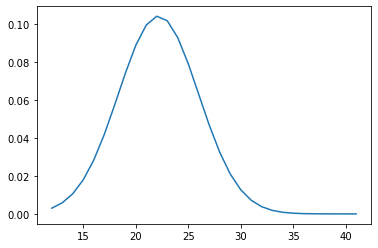

20 to 25


In [76]:
## Open and read data file as specified in the question
## Print the required output in given format

from scipy.stats import norm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')

swimming_age = olympics.loc[(olympics['Sport'] == 'Swimming') & (olympics['Year'] >= 2000) & (olympics['Year']<=2016)]['Age']
swimming_age = sorted(swimming_age)

mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)

probablity_pdf = norm.pdf(swimming_age, loc = mean_swimming_age, scale = std_swimming_age)

plt.plot(swimming_age, probablity_pdf)
plt.show()
print('20 to 25')

In [88]:
from scipy.stats import stats
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

ind = olympics[olympics['region'] == 'India']
gold = ind[ind["Medal"] == 'Gold']

count = gold.groupby('Year')['Medal'].value_counts()

if stats.skew(count, bias = False) > 0:
    print("Right Skewed")
else:
    print('Left Skewed')

Left Skewed


In [7]:
#from scipy.stats import stats
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
olympics.head()
summer = olympics[olympics['Season'] == 'Summer']
citys = summer['City'].value_counts()
city = citys.index
value = citys.values
print(len(city))
# plt.bar(city, value)
# plt.xticks(rotation = 90)
# plt.show()
olympics.head()

23


,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


## Most Female Gold Medalists


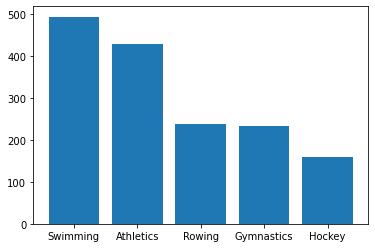

Swimming


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
Female=olympics[(olympics["Sex"]=="F") & (olympics["Medal"]=="Gold")]
a = Female.groupby('Sport').count()['Sex'].sort_values(ascending = False)
sport = a.index[:5]
value = a.values[:5]
plt.bar(sport, value)
plt.show()
print(sport[0])

## Find Skewness

In [1]:
from scipy.stats import stats
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

ind = olympics[olympics['region'] == 'India']
gold = ind[ind["Medal"] == 'Gold']

count = gold.groupby('Year')['Medal'].value_counts()

if stats.skew(count, bias = False) > 0:
    print("Right Skewed")
else:
    print('Left Skewed')

Left Skewed


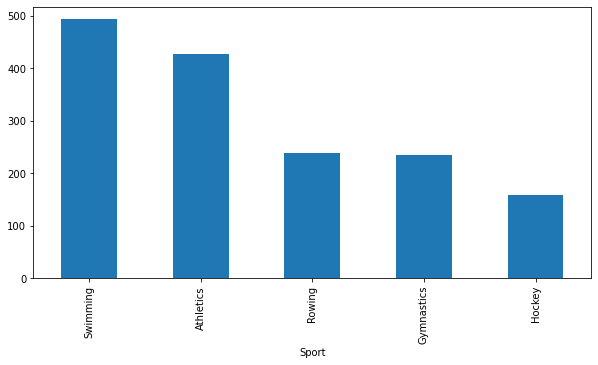

Swimming


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
Female=olympics[(olympics["Sex"]=="F") & (olympics["Medal"]=="Gold")]
Female.groupby('Sport').count()['Sex'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()
print('Swimming')

## Standard Deviation of Gold Medals

In [19]:
## Open and read data file as specified in the question
## Print the required output in given format

import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
df = olympics.loc[(olympics.City == 'London')& (olympics.region == 'UK') & (olympics.Medal == "Gold")]
df = df.groupby('Year')['Medal'].value_counts()

df1 = olympics.loc[(olympics.City != 'London')& (olympics.region == 'UK') & (olympics.Medal == "Gold")]
df1 = df1.groupby('Year')['Medal'].value_counts()

print(statistics.stdev(df))
print(statistics.stdev(df1))

71.97453253292676
18.14528124684469


In [2]:
## Open and read data file as specified in the question
## Print the required output in given format

import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
df = olympics[(olympics.City == 'London')& (olympics.region == 'UK') & (olympics.Medal == "Gold")]
df = df.groupby('Year')['Medal'].value_counts()

df1 = olympics[(olympics.City != 'London')& (olympics.region == 'UK') & (olympics.Medal == "Gold")]
df1 = df1.groupby('Year')['Medal'].value_counts()

print(statistics.stdev(df))
print(statistics.stdev(df1))

71.97453253292676
193.60993960053085


## Standardize the Data


In [26]:
## Open and read data file as specified in the question
## Print the required output in given format
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

df = olympics[olympics.Sport == 'Shooting']

# standardizing 
# Xstand = (X - mean(X)) / Standard_Deviation (X)

age = df.Age
stand = (age - np.mean(age))/ np.std(age)
print(int(np.mean(stand)))
print(int(np.std(stand)))

0
1


## Correlation analysis


In [34]:
## Open and read data file as specified in the question
## Print the required output in given format
import statistics
from scipy.stats import spearmanr

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
df = olympics[(olympics.Medal == 'Gold') | (olympics.Medal == 'Silver') | (olympics.Medal == 'Bronze')]
#cov = np.cov(df.Age, df.Medal)

x = spearmanr(df.Age, df.Medal)
y = x.correlation
if y< 0:
    print('Negative')
else:
    print('Positive')

Positive


In [3]:
## Open and read data file as specified in the question
## Print the required output in given format
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
labels, categories = pd.factorize(olympics.Medal)
olympics['Medal_labels'] = labels

if olympics.Age.corr(olympics.Medal_labels)>0:
    print('Positive')
else:
    print('Negative')

Positive


## Calculate IQR

In [7]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

q1 = np.percentile(olympics.Age, 25, interpolation='midpoint')
q3 = np.percentile(olympics.Age, 75, interpolation = 'midpoint')
print(q3-q1)

6.0


# Data Visualization
## Summer olympics hosted


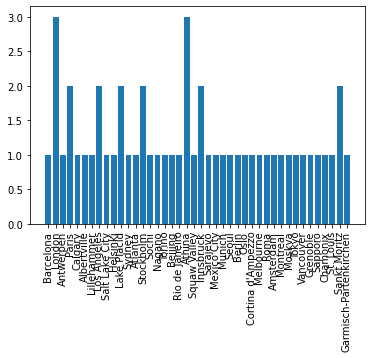

42


In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

d = {}
year = olympics.Year
city = olympics.City


for i in range(len(city)):
    if city[i] in d:
        #if city[i] != None or year[i] != None or type[year[i]] != None or type(city[i]) != None:
        a = int(year[i])
        d[city[i]].add(a)  # because list and set is mutable.

    else:
        d[city[i]] = {year[i]} # put this as set coz we need unique year values, if we put list, we will get lots of same year 
                               # values
        #print(d.values())
dct = {}
for i, j in d.items():
    x = len(j)
    dct[i] = x
plt.bar(dct.keys(), dct.values())
plt.xticks(rotation = 90)
plt.show()
print(len(dct))

## Most number of medals

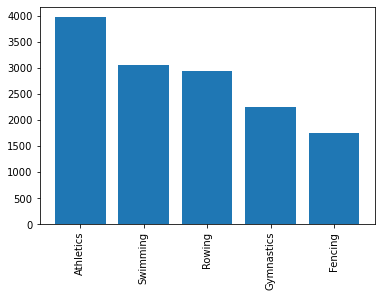

Athletics


In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
olympics = olympics[(olympics.Medal == 'Gold') | (olympics.Medal == 'Silver') | (olympics.Medal == 'Bronze')]
g = olympics.groupby('Sport')['Medal'].count().sort_values(ascending=False)[:5]
plt.bar(g.index, g.values)
plt.xticks(rotation=90)
plt.show()
print(g.index[0])

## Most number of Gold medals


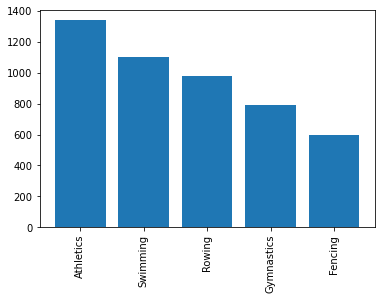

Athletics


In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
olympics = olympics[(olympics.Medal == 'Gold')]
g = olympics.groupby('Sport')['Medal'].count().sort_values(ascending=False)[:5]
plt.bar(g.index, g.values)
plt.xticks(rotation=90)
plt.show()
print(g.index[0])

## India First Gold Medal


In [134]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
olympics = olympics[(olympics.Medal == 'Gold') & (olympics.region == 'India')]
years = olympics.Year.unique()
print(np.sort(years)[0])

1924


## Most Popular Event

In [143]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
o = olympics.Name.value_counts()[:5]
o

Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Name, dtype: int64

In [2]:
min = -2147483648
n = int(input())
a = []
for i in range(n):
    x = int(input())
    a.append(x)
x = a.sort(reverse = True)
if n == 0 or n == 1:
    print(min)
else:
    print(x[1])

7
2
13
4
1
3
6
28


TypeError: 'NoneType' object is not subscriptable